In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_loaders import generate_shift_dataset

In [5]:
p_tests = np.linspace(0.1, 0.8, 5)
data = []
for i in range(len(p_tests)):
    X_train, y_train= generate_shift_dataset(n=500, p=p_tests[i], seed=0)
    data.append((X_train, y_train))

In [9]:
p_tests

array([0.1  , 0.275, 0.45 , 0.625, 0.8  ])

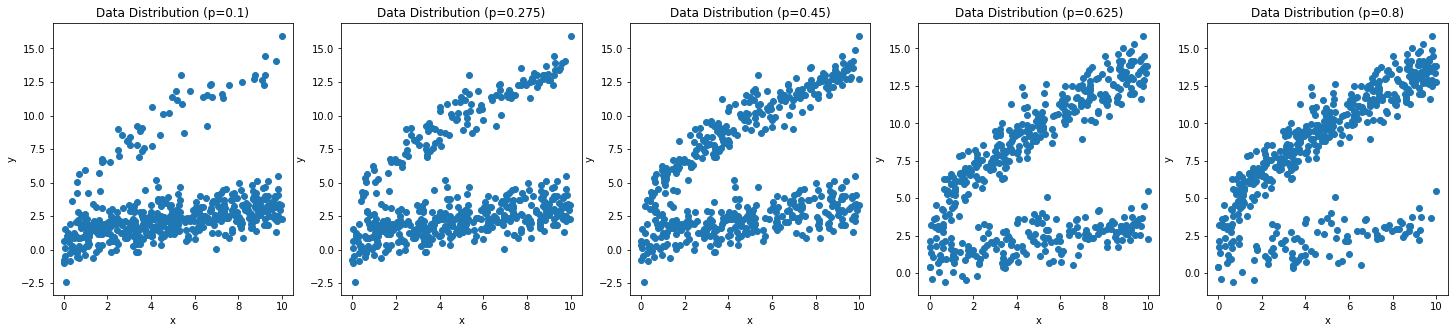

In [8]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
for i in range(len(data)):
    ax[i].scatter(data[i][0], data[i][1])
    ax[i].set_title("Data Distribution (p={})".format(round(p_tests[i], 3)))
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    
plt.savefig("figs/p_test_distributions.pdf")

In [6]:
df = pd.read_csv("results/sim_sweep_p_test.csv")
df.groupby(["dataset", "method", "gamma", "p_train"]).agg(["mean", "std"])["test_mse"]

mean       std
dataset method        gamma p_train                     
shifted erm           1.0   0.100     6.289220  0.408295
                            0.200    19.206562  8.905240
                            0.275    12.543671  0.661855
                            0.450    15.483881  0.411492
                            0.625    14.969723  0.446294
                            0.800    10.602085  0.465851
        ru_regression 2.0   0.200    16.196073  4.611959
                      4.0   0.200    15.628943  2.515767
                      8.0   0.200    15.564466  1.884007
                      16.0  0.200    15.550502  1.530931

In [8]:
df[df["p_train"] == df["p_test"]].groupby(["dataset", "method", "gamma"]).agg(["mean", "std"])["test_mse"]

,,,mean,std
dataset,method,gamma,,
shifted,erm,1.0,11.977716,3.407321


In [16]:
df.groupby(["dataset", "method"]).agg(["mean", "std"])

gamma           test_loss            test_mse  \
                              mean       std      mean       std      mean   
dataset        method                                                        
shifted        erm             NaN       NaN  2.017378  0.110692  2.017378   
               ru_regression   7.5  5.437962  4.078993  0.685966  1.672522   
shifted_oracle erm             NaN       NaN  0.997780  0.023067  0.997780   

                                            seed            
                                   std      mean       std  
dataset        method                                       
shifted        erm            0.110692  4.500000  3.027650  
               ru_regression  0.088101  4.666667  3.023716  
shifted_oracle erm            0.023067  4.500000  3.027650